### Importación de datos



In [36]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [37]:
import pandas as pd

# Concatenar los 4 DataFrames y agregar una columna 'Tienda'
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unir todos en un solo DataFrame
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


#1. Análisis de facturación



**Cálculo de la facturación total por tienda**

In [30]:
# Calcular la facturación total por tienda (suma de la columna "Precio")
facturacion_por_tienda = df_total.groupby("Tienda")["Precio"].sum().sort_values(ascending=False)

# Mostrar facturación por tienda con formato estándar (sin notación científica)
print("💰 Facturación total por tienda:")
for tienda, valor in facturacion_por_tienda.items():
    print(f"{tienda}: ${valor:,.2f}")


💰 Facturación total por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


**Calcular facturación total de todas las tiendas**

In [31]:
# Calcular facturación total (todas las tiendas combinadas)
facturacion_total = df_total["Precio"].sum()

# Mostrar facturación total con formato estándar
print(f"\n💵 Facturación total de todas las tiendas: ${facturacion_total:,.2f}")



💵 Facturación total de todas las tiendas: $4,403,619,200.00


**Visualizar los resultados con gráfico de barras**

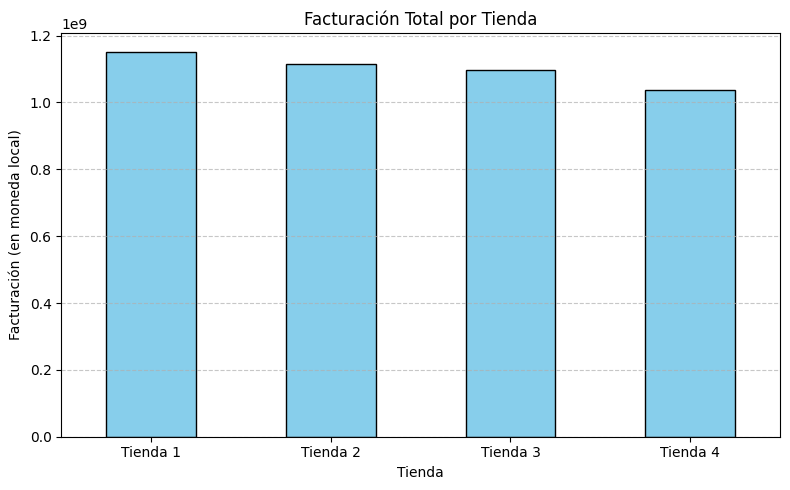

In [32]:
import matplotlib.pyplot as plt

# Crear gráfico de barras para la facturación por tienda
plt.figure(figsize=(8, 5))
facturacion_por_tienda.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Facturación Total por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación (en moneda local)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [38]:
# Ventas por categoría por tienda
ventas_tienda_1 = tienda.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_tienda_2 = tienda2.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_tienda_3 = tienda3.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_tienda_4 = tienda4.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)

# Mostrar resultados de ventas por categoría
print("Ventas por categoría en Tienda 1:")
print(ventas_tienda_1, "\n")
print("Ventas por categoría en Tienda 2:")
print(ventas_tienda_2, "\n")
print("Ventas por categoría en Tienda 3:")
print(ventas_tienda_3, "\n")
print("Ventas por categoría en Tienda 4:")
print(ventas_tienda_4, "\n")

Ventas por categoría en Tienda 1:
Categoría del Producto
Electrónicos              429,493,500.00
Electrodomésticos         363,685,200.00
Muebles                   187,633,700.00
Instrumentos musicales     91,299,000.00
Deportes y diversión       39,290,000.00
Juguetes                   17,995,700.00
Artículos para el hogar    12,698,400.00
Libros                      8,784,900.00
Name: Precio, dtype: float64 

Ventas por categoría en Tienda 2:
Categoría del Producto
Electrónicos              410,831,100.00
Electrodomésticos         348,567,800.00
Muebles                   176,426,300.00
Instrumentos musicales    104,990,300.00
Deportes y diversión       34,744,500.00
Juguetes                   15,945,400.00
Artículos para el hogar    14,746,900.00
Libros                     10,091,200.00
Name: Precio, dtype: float64 

Ventas por categoría en Tienda 3:
Categoría del Producto
Electrónicos              410,775,800.00
Electrodomésticos         329,237,900.00
Muebles                   201

**Gráfico de Ventas por Categoría**

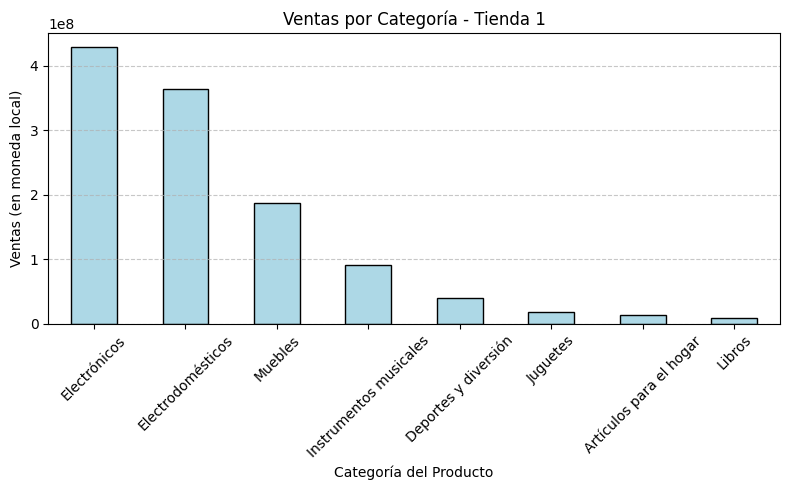

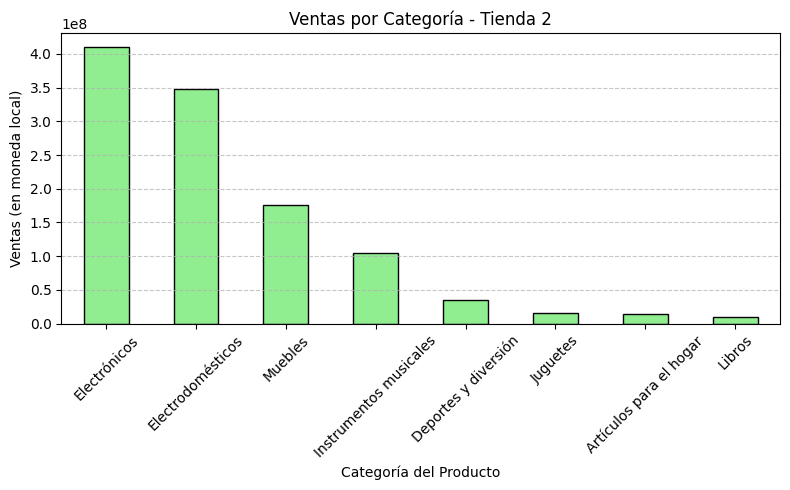

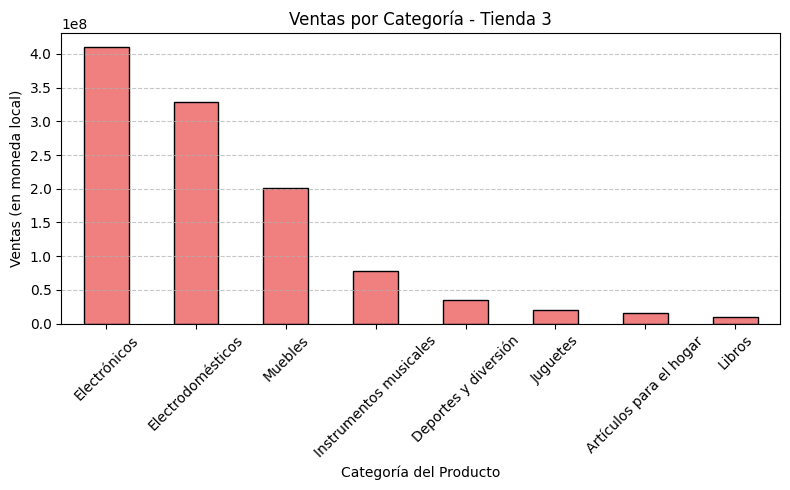

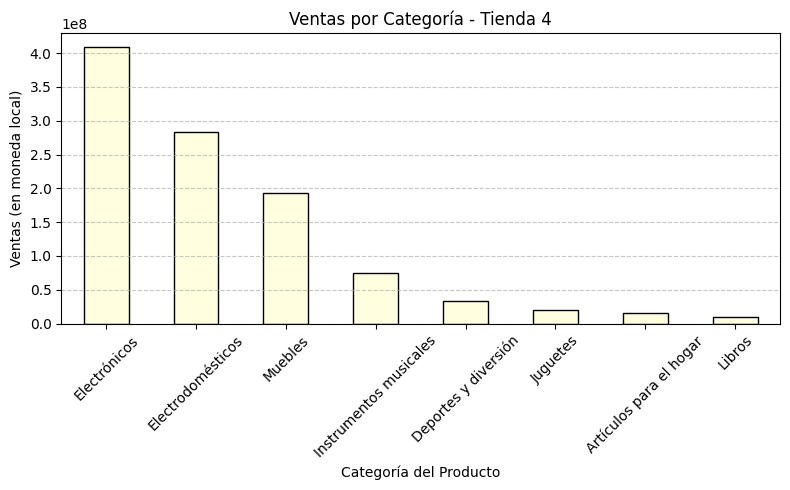

In [42]:
import matplotlib.pyplot as plt

# Graficar ventas por categoría para Tienda 1
plt.figure(figsize=(8, 5))
ventas_tienda_1.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Ventas por Categoría - Tienda 1")
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas (en moneda local)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Graficar ventas por categoría para Tienda 2
plt.figure(figsize=(8, 5))
ventas_tienda_2.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Ventas por Categoría - Tienda 2")
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas (en moneda local)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Graficar ventas por categoría para Tienda 3
plt.figure(figsize=(8, 5))
ventas_tienda_3.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Ventas por Categoría - Tienda 3")
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas (en moneda local)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Graficar ventas por categoría para Tienda 4
plt.figure(figsize=(8, 5))
ventas_tienda_4.plot(kind="bar", color="lightyellow", edgecolor="black")
plt.title("Ventas por Categoría - Tienda 4")
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas (en moneda local)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [43]:
# Calcular la calificación promedio por tienda
calificacion_promedio = df_total.groupby("Tienda")["Calificación"].mean().sort_values(ascending=False)

# Mostrar calificación promedio por tienda
print("⭐ Calificación promedio por tienda:")
for tienda, calificacion in calificacion_promedio.items():
    print(f"{tienda}: {calificacion:.2f}")


⭐ Calificación promedio por tienda:
Tienda 3: 4.05
Tienda 2: 4.04
Tienda 4: 4.00
Tienda 1: 3.98


# 4. Productos más y menos vendidos

Cantidad

In [46]:
# Contar las ocurrencias de cada producto por tienda
ventas_por_producto_tienda = df_total.groupby(["Tienda", "Producto"]).size().unstack(fill_value=0)

# Mostrar los TOP 3 productos más vendidos por tienda
print("📈 TOP 3 productos más vendidos por tienda:")
for tienda in ventas_por_producto_tienda.index:
    productos_mas_vendidos = ventas_por_producto_tienda.loc[tienda].sort_values(ascending=False).head(3)
    print(f"\n{tienda}:")
    print(productos_mas_vendidos)

# Mostrar los TOP 3 productos menos vendidos por tienda
print("\n📉 TOP 3 productos menos vendidos por tienda:")
for tienda in ventas_por_producto_tienda.index:
    productos_menos_vendidos = ventas_por_producto_tienda.loc[tienda].sort_values(ascending=True).head(3)
    print(f"\n{tienda}:")
    print(productos_menos_vendidos)


📈 TOP 3 productos más vendidos por tienda:

Tienda 1:
Producto
Armario          60
TV LED UHD 4K    60
Microondas       60
Name: Tienda 1, dtype: int64

Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: Tienda 2, dtype: int64

Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: Tienda 3, dtype: int64

Tienda 4:
Producto
Cama box      62
Cubertería    59
Cama king     56
Name: Tienda 4, dtype: int64

📉 TOP 3 productos menos vendidos por tienda:

Tienda 1:
Producto
Auriculares con micrófono    33
Celular ABXY                 33
Olla de presión              35
Name: Tienda 1, dtype: int64

Tienda 2:
Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Name: Tienda 2, dtype: int64

Tienda 3:
Producto
Bloques de construcción    35
Set de vasos               36
Mochila                    36
Name: Tienda 3, dtype: int64

Tienda 4:
Producto
Guitarra eléctrica    3

Dinero Generaron

In [45]:
# Calcular la facturación total por producto en cada tienda
facturacion_por_producto_tienda = df_total.groupby(["Tienda", "Producto"])["Precio"].sum().unstack(fill_value=0)

# Mostrar los TOP 3 productos que más dinero generaron por tienda
print("💰 TOP 3 productos que más dinero generaron por tienda:")
for tienda in facturacion_por_producto_tienda.index:
    top_3_productos = facturacion_por_producto_tienda.loc[tienda].sort_values(ascending=False).head(3)
    print(f"\n{tienda}:")
    print(top_3_productos)


💰 TOP 3 productos que más dinero generaron por tienda:

Tienda 1:
Producto
TV LED UHD 4K   142,150,200.00
Refrigerador    112,143,300.00
Iphone 15        97,902,200.00
Name: Tienda 1, dtype: float64

Tienda 2:
Producto
Iphone 15       113,225,800.00
TV LED UHD 4K   103,375,000.00
Refrigerador     97,632,500.00
Name: Tienda 2, dtype: float64

Tienda 3:
Producto
Refrigerador    99,889,700.00
TV LED UHD 4K   96,669,100.00
Iphone 15       93,225,700.00
Name: Tienda 3, dtype: float64

Tienda 4:
Producto
Iphone 15       96,697,500.00
TV LED UHD 4K   90,295,300.00
Smart TV        82,790,400.00
Name: Tienda 4, dtype: float64


# 5. Envío promedio por tienda

In [47]:
# Calcular el costo de envío promedio por tienda
envio_promedio_por_tienda = df_total.groupby("Tienda")["Costo de envío"].mean()

# Mostrar el costo de envío promedio por tienda con formato estándar
print("🚚 Envío promedio por tienda:")
for tienda, valor in envio_promedio_por_tienda.items():
    print(f"{tienda}: ${valor:,.2f}")


🚚 Envío promedio por tienda:
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


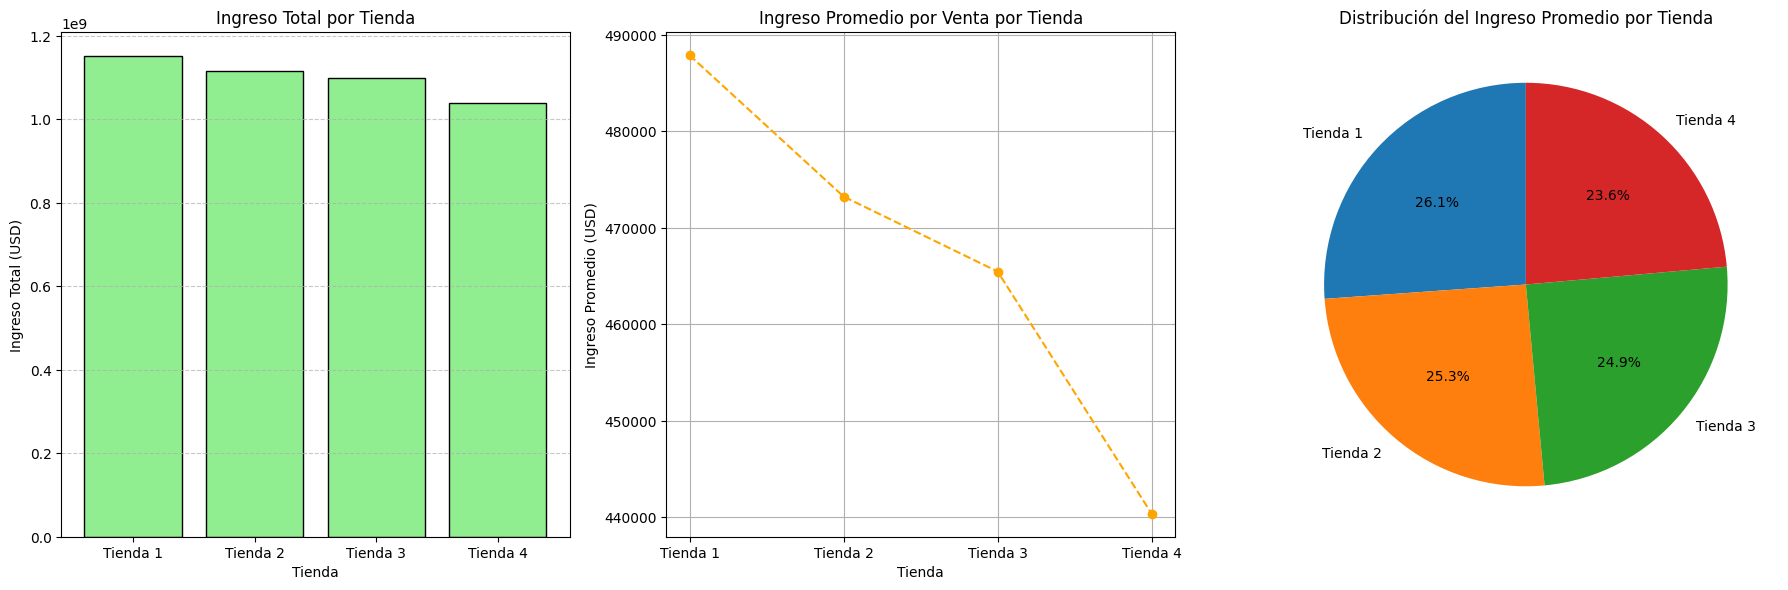

In [48]:
import matplotlib.pyplot as plt

# Calcular ingresos totales y promedio por tienda
ingreso_totales_por_tienda = df_total.groupby("Tienda")["Precio"].sum()
ingreso_promedio_por_tienda = df_total.groupby("Tienda")["Precio"].mean()

# Crear una figura con 3 subgráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Ingresos Totales por Tienda (Barras)
axes[0].bar(ingreso_totales_por_tienda.index, ingreso_totales_por_tienda.values, color="lightgreen", edgecolor="black")
axes[0].set_title('Ingreso Total por Tienda')
axes[0].set_xlabel('Tienda')
axes[0].set_ylabel('Ingreso Total (USD)')
axes[0].grid(axis='y', linestyle="--", alpha=0.7)

# Gráfico 2: Ingreso Promedio por Venta (Línea)
axes[1].plot(ingreso_promedio_por_tienda.index, ingreso_promedio_por_tienda.values, marker='o', linestyle='--', color='orange')
axes[1].set_title('Ingreso Promedio por Venta por Tienda')
axes[1].set_xlabel('Tienda')
axes[1].set_ylabel('Ingreso Promedio (USD)')
axes[1].grid(True)

# Gráfico 3: Ingreso Promedio por Venta (Circular)
axes[2].pie(ingreso_promedio_por_tienda, labels=ingreso_promedio_por_tienda.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Distribución del Ingreso Promedio por Tienda')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()
